Name: Lê Hoàng Anh Đức
ID: 12119268
Class: DSEB 63

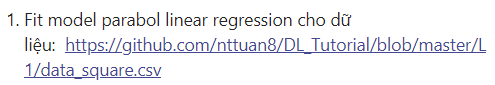

In [1]:
# Warning Removal
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('D:\\Năm 3 - HK1\\ML\\HW\\data_square.csv')
df

,Diện tích,Giá nhà
0,30.0000,-100.0000
1,32.4138,-190.7250
2,34.8276,-269.7980
3,37.2414,-337.2180
4,39.6552,-392.9850
5,42.0690,-437.0990
6,44.4828,-469.5600
7,46.8966,-490.3690
8,49.3103,-499.5240
9,51.7241,-497.0270


Let T = Xw = w2*x^2+ w1*x + w0
X = [1,x,x^2]^T, now we can easily prove that W = (X^T*X)^-1*X^T.Y

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Diện tích'],df['Giá nhà'],test_size=0.3,random_state=21)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train).reshape(-1,1), np.array(y_test).reshape(-1,1), 


In [4]:
x2 = np.array(X_train**2).reshape(-1,1)
x1 = X_train.reshape(-1,1)
x0 = np.ones([X_train.shape[0],1])
Xbar = np.concatenate((x0, x1, x2),axis=1)
Xbar.shape


(21, 3)

In [5]:
y = np.array(y_train).reshape(y_train.shape[0],1)
y.shape

(21, 1)

In [6]:
#(X^TX)
a =np.dot(Xbar.T,Xbar)
#X^T.t 
b=np.dot(Xbar.T,y)
# W = (X^TX)^-1.X^T.t
W = np.dot(np.linalg.pinv(a),b)

In [7]:
a=np.polyfit(df['Diện tích'],df['Giá nhà'],deg = 2 )
a

array([ 1.00000199e+00, -1.00000222e+02,  2.00000579e+03])

R^2: 0.999999999994588
MAE: 9.097620538151365e-07
MSE: 2.5744168937369395e-06
RMSE: 0.00160449895410902


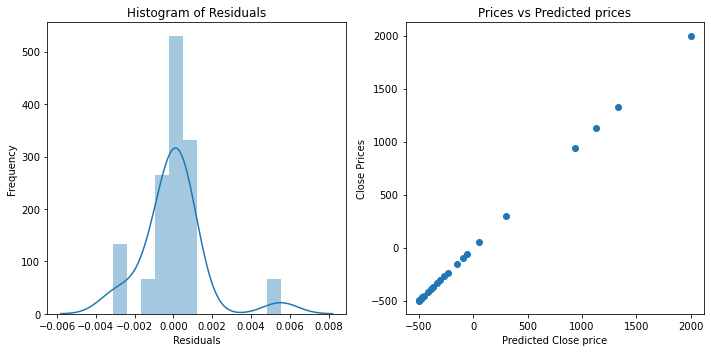

In [8]:
y0 = W[0] + x1*W[1] + x2*W[2]

def evaluate_model(y_pred, y_train, X_train):
    fig, ax= plt.subplots(1,2,figsize=(10,5))
    sns.distplot((y_train-y_pred),ax= ax[0])
    # Checking Normality of errors
    ax[0].set_title("Histogram of Residuals")
    ax[0].set_xlabel("Residuals")
    ax[0].set_ylabel("Frequency")
    # The difference between actual close and predicted close price
    ax[1].scatter(y_pred,y_train)
    ax[1].set_ylabel("Close Prices")
    ax[1].set_xlabel("Predicted Close price")
    ax[1].set_title("Prices vs Predicted prices")
    plt.tight_layout()
    # Model Evaluation
    y_mean = np.mean(y_train)
    tss = np.sum((y_train - y_mean)**2)
    rss = np.sum((y_train - y_pred)**2)
    r2 = 1- rss/tss
    print('R^2:',r2)
    print('MAE:', np.mean(np.abs(y_train-y_pred))**2)
    print('MSE:', np.mean((y_train-y_pred)**2))
    print('RMSE:', np.sqrt(np.mean((y_train-y_pred)**2)))
    return plt.show()

evaluate_model(y0,y_train,X_train)




R^2: 0.9999999999948866
MAE: 1.8396351897004617e-06
MSE: 2.9515606386494998e-06
RMSE: 0.0017180106631361459


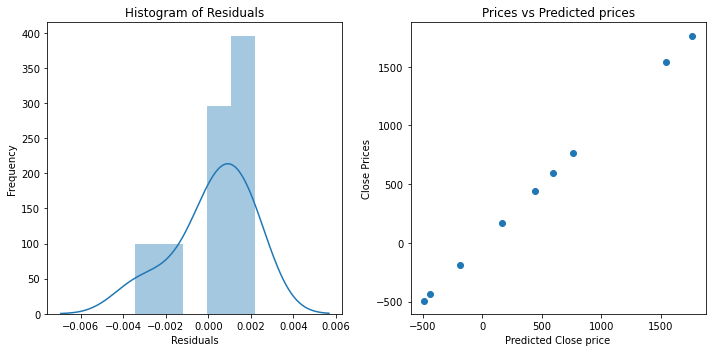

In [9]:
y_test_pred = W[0] + X_test.reshape(-1,1)*W[1] + X_test.reshape(-1,1)**2*W[2]
evaluate_model(y_test_pred,y_test,X_test)

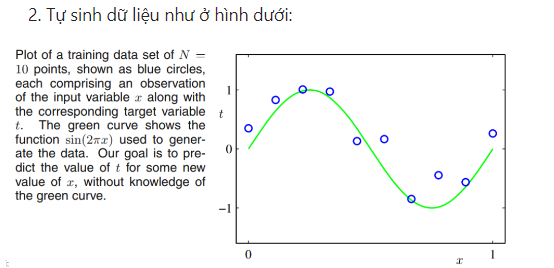

In [10]:
# y0 = (np.random.randint(-10000000,10000000,10)/10000000)
x0 = np.sort(np.random.randint(0,10000000,10)/10000000)
y0 = np.sin(2*np.pi*x0)+(np.random.randint(-100,100,10)/10000)
xy = pd.DataFrame([x0,y0],index=['x','y']).T

<AxesSubplot:xlabel='x', ylabel='y'>

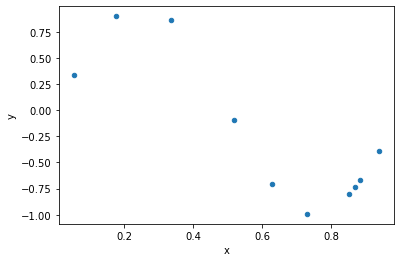

In [11]:
xy.plot(kind='scatter',x='x',y='y')

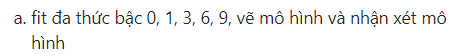

In [12]:
def split_data(X, y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=21)
    X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train).reshape(-1,1), np.array(y_test).reshape(-1, 1),
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split_data(xy.x,xy.y)

In [13]:
# def fx(X_train,Y_train,deg): 
#     w= np.polyfit(X_train,y_train,deg = deg)
#     X_train = np.array(X_train).reshape((x,1))
#     Xbar = np.ones((x.shape[0],1))
#     deg = w.size
#     w = w[::-1]
#     for i in range(1,deg):
#         Xbar = np.concatenate((Xbar,x**i),axis=1)
#     return np.dot(Xbar,w), Xbar
# y_pred, Xbar = fx(X_train,w)
# evaluate_model(y_pred,y_train,X_train)
# # plt.scatter(x=x0,y=y0,marker = 'o')
# # plt.xticks(np.arange(0, 1, step=0.2))
# # plt.yticks(np.arange(-1, 1, step=0.2))
# # w= np.polyfit(x0,y0,deg = 1)
# # plt.plot(x0,fx(x0,w),color = 'red')
# # # plt.show()

# # def reg(X,Y,Deg):
# #     plt.scatter(x=X,y=Y,marker = 'o')
# #     plt.xticks(np.arange(0, 1, step=0.2))
# #     plt.yticks(np.arange(-1, 1, step=0.2))
# #     w= np.polyfit(X,Y,deg = Deg)
# #     plt.plot(X,fx(X,w),color = 'red')
# #     plt.show()


R^2: 0.0
MAE: 0.13189088396112497
MSE: 0.18129334686243728
RMSE: 0.4257855644129299


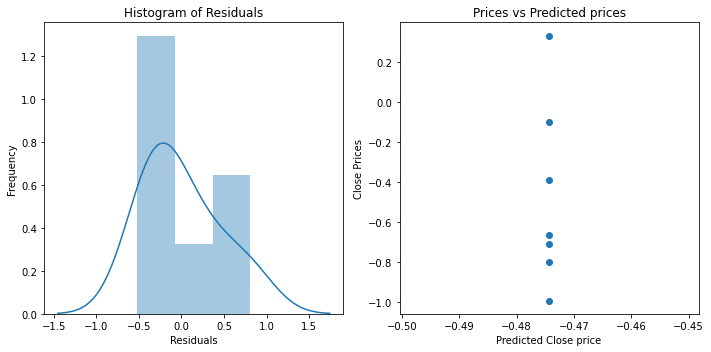

In [14]:
def fx(X_train,y_train,deg): 
    w= np.polyfit(X_train,y_train,deg = deg)
    X_train = np.array(X_train).reshape(-1,1)
    Xbar = np.ones((X_train.shape[0],1))
    deg = w.size
    w = w[::-1]
    for i in range(1,deg):
        Xbar = np.concatenate((Xbar,X_train**i),axis=1)
    return np.dot(Xbar,w),w, Xbar
y_pred,w,Xbar = fx(X_train,y_train,0)
evaluate_model(y_pred,y_train,X_train)

R^2: 0.6040602876025044
MAE: 0.05256548187256326
MSE: 0.07178123561629282
RMSE: 0.26792020382250537


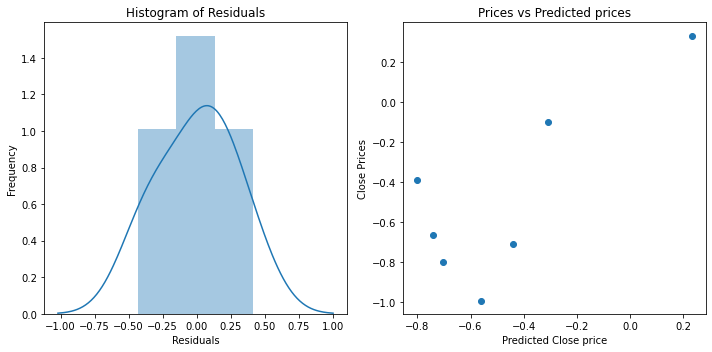

In [15]:
y_pred,w,Xbar = fx(X_train,y_train,1)
evaluate_model(y_pred,y_train,X_train)

R^2: 0.9921425202500032
MAE: 0.0012009737907047633
MSE: 0.001424508801780759
RMSE: 0.03774266553624372


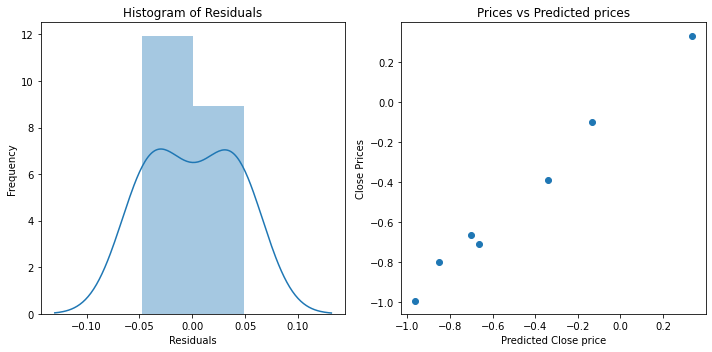

In [16]:
y_pred,w,Xbar = fx(X_train,y_train,3)
evaluate_model(y_pred,y_train,X_train)

R^2: 1.0
MAE: 3.54157519262637e-26
MSE: 4.182973380490791e-26
RMSE: 2.045231864726049e-13


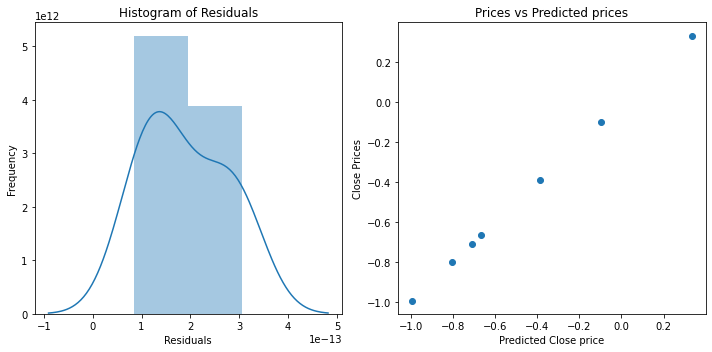

In [17]:
y_pred,w,Xbar = fx(X_train,y_train,6)
evaluate_model(y_pred,y_train,X_train)

R^2: 1.0
MAE: 1.5402565773197807e-28
MSE: 1.9503221222657494e-28
RMSE: 1.3965393378869602e-14


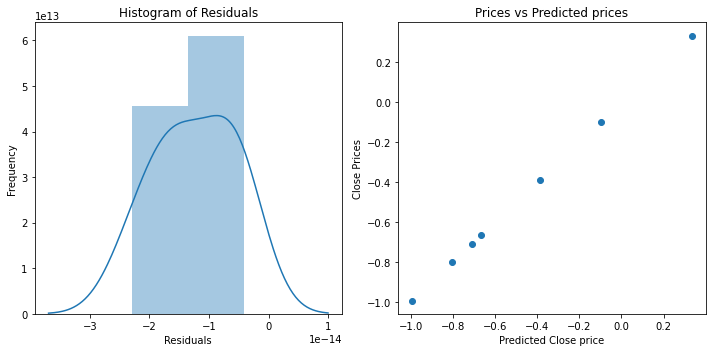

In [18]:
y_pred,w,Xbar = fx(X_train,y_train,9)
evaluate_model(y_pred,y_train,X_train)

We can observe that when the degree increase, R^2 increase and other Evaluator decrese, which make the model better

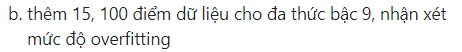

In [19]:
x_add = pd.DataFrame(np.random.randint(0,10000000,15)/10000000,columns=['x'])
x_add['y'] = np.sin(2*np.pi*x_add['x']) + np.random.randint(-100,100,15)/1000
new = pd.concat([xy,x_add],axis = 0,ignore_index=True).sort_values('x')

R^2: 1.0
MAE: 1.5402565773197807e-28
MSE: 1.9503221222657494e-28
RMSE: 1.3965393378869602e-14


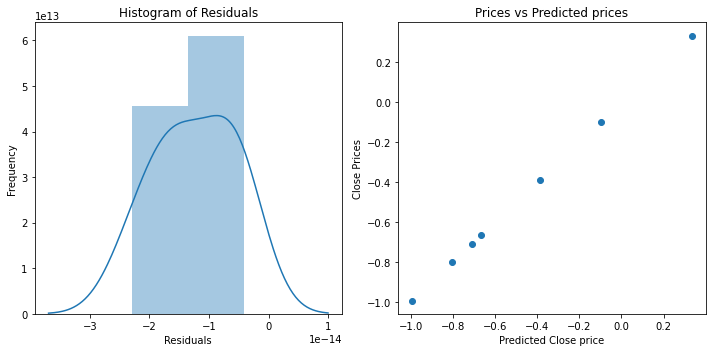

In [20]:
X_train, X_test, y_train, y_test = split_data(xy.x,xy.y)
y_pred,w,Xbar = fx(X_train,y_train,9)
evaluate_model(y_pred,y_train,X_train)

In [33]:
# y_pred = Xbar.dot(w)
# evaluate_model(y_pred,y_test,X_test)

In [31]:
Xbar.dot(w)

array([[-0.09768547],
       [-0.99261299],
       [-0.80154263],
       [ 0.33337511],
       [-0.70957945],
       [-0.66476588],
       [-0.38766231]])

In [25]:
w.shape

(10, 1)

In [ ]:
# w.shape

In [ ]:
# def reg(X,Y,Deg):
#     plt.scatter(x=X,y=Y,marker = 'o')
#     plt.xticks(np.arange(0, 1, step=0.2))
#     plt.yticks(np.arange(-1, 1, step=0.2))
#     w= np.polyfit(X,Y,deg = Deg)
#     plt.plot(X,fx(X,w),color = 'red')
#     plt.show()
# reg(X_tra)

In [ ]:
x_add = pd.DataFrame(np.random.randint(0,10000000,100)/10000000,columns=['x'])
x_add['y'] = np.sin(2*np.pi*x_add['x']) + np.random.randint(-100,100,100)/1000
new = pd.concat([xy,x_add],axis = 0,ignore_index=True).sort_values('x')

In [ ]:
X_train, X_test, y_train, y_test = split_data(xy.x,xy.y)
y_pred = fx(X_train,y_train,9)
evaluate_model(y_pred,y_train,X_train)

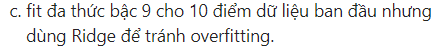

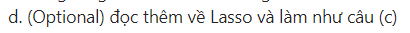